# Stochastic Differential Equations


[Stochastic differential equations (SDEs)](https://en.wikipedia.org/wiki/Stochastic_differential_equation) generalise ordinary differential equations (ODEs) to include the effects of randomness. Rephrasing from Wikipedia 

```
The most common form of SDEs in the literature is an ordinary differential equation with the right hand side perturbed by a term representing a random or noise variable.
```

Think of this as

$$
\dot X = f(X) + \text{random} 
$$

where the "random" term is some noise or fluctuating factors that are randomly perturbing the ODE $\dot X = f(X)$. 


For our individual leaving the pub, we previously considered only random motion at discrete steps. Now we allow for a deterministic component and continuous time. The solution to $\dot X = f(X)$ gives the path home before any drinks. This path will be perturbed by random fluctuations (random steps) depending on how inebriated the individual is. 

---

### Notation


We will write our SDE as follows

$$
\dot X(t) = f(X(t)) + \sigma \xi(t)
$$

where $\xi(t)$ represents random fluctuations (normally distributed random numbers) and $\sigma$ is a parameter that determines how strong the random fluctuations are. We will only consider one-variable equations, so $X \in \mathbb R$ and $f: \mathbb R \to \mathbb R$. 

Later we will generalise the SDE above slightly in order to consider the standard model for the stock market. 

(In Wikipedia, and in later maths modules where you study SDEs, the above SDE will probably be written as $dX_t = f(X_t)dt + \sigma dW_t$. You will learn later why this is.)


In [1]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

---

## Time stepping

We will follow very closely our approach for ODEs. Our goal is to approximate $X(t)$ on a time grid, $t_0, t_1, \cdots, t_n \cdots t_N$. We let $X_n$ denote our numerical approximation to the true solution $X(t_n)$. 

We know how to take Euler time steps for the ODE $\dot X(t) = f(X(t))$, 

$$
X_{n+1} = X_n + \Delta t  f(X_n)
$$


We simply need to add in the contribution from the random component. You are surely tempted to try 
 
$$
X_{n+1} = X_n + \Delta t  f(X_n) + \Delta t  \sigma  \xi_n
$$

where $\xi_n$ is a random number from the standard normal distribution. **However, this is incorrect! Don't do it!**

The correct time-stepping formula is:

$$
\boxed{X_{n+1} = X_n + \Delta t  f(X_n) + \sqrt{\Delta t} \,\, \sigma  \xi_n}
$$

One multiplies the random/noise term by $\sqrt{\Delta t}$ and not $\Delta t$. This formula generalises Euler time stepping to our SDE. (This is also called the [Euler–Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).)


Using $\sqrt{\Delta t}$ and calling `np.random.randn` are the only new things you need to know for solving an SDEs compared with ODEs. It's really that simple! 


---

## Our first SDE

Consider the SDE

$$
\dot X(t) = -\mu X(t)  + \sigma \xi(t)
$$

This generalises our first ODE $\dot X = -\mu X$ from week 4 to include a random term. (This equation is known as the [Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process).)

The Python code below implements Euler time stepping for this SDE. We generate `Npaths` solutions simultaneously. Note we define a variable `root_dt = np.sqrt(dt)` to use in our time-stepping loop.

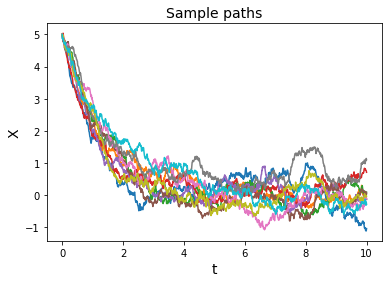

In [13]:
# Time step the SDE: dot X = -mu X + sigma xi, by Euler's method.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 10
Nsteps = 1000
Npaths = 10
X0 = 5
mu = 0.75
sigma = 0.5

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    F_of_X = -mu * X[n,:]
    X[n+1,:] =  X[n,:] + dt * F_of_X + sigma * root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()
 

**Exercise:** In the cell above, play with parameters and observe the solutions. In particular: 
- change the $\sigma$ to larger and smaller values
- change the number of paths
- change $X_0$ to a negative value


---
## Why $\sqrt{\Delta t}$?

We are not going to explain the mathematics behind the $\sqrt{\Delta t}$ in time stepping the random term, but we can easily show that is seems correct and that $\Delta t$ is certainly wrong. The code cell below time steps the SDE

$$
\dot X(t) = \xi(t)
$$

Run the cell below and then do the exercises.

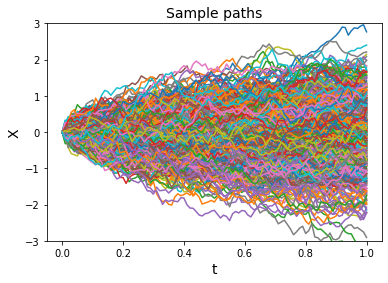

In [14]:
# Time step the SDE: dot X = xi, by Euler's method.

# Problem setup. 
tf = 1
Nsteps = 100
Npaths = 500
X0 = 0

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    X[n+1,:] =  X[n,:] + root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.ylim(-3, 3)
plt.show()


What you are seeing is known as Brownian motion, or it would be if we took $\Delta t \to 0$. It is the limit of the random walk where one takes infinitely many steps that become infinitely small.

**Exercises:**

- To see that $\sqrt{\Delta t}$ is the right way to time step, re-run the cell with different values of `Nsteps`. Since `tf` is fixed, this amounts to changing the time step `dt`. Try `Nsteps = 10` and `1000`. The solutions will look different, but the distribution of values at $t_f=1$ will be about the same. Add a print statement at the end of the cell to print the standard deviation at the final time. (If you have forgotten how to, look at the notebook on the Random Walk.) Run the cell for `Nsteps = 10, 100, 1000`. The value of the standard deviation should be more-or-less independent of the number of time steps, and hence $\Delta t$.

- Here is something fun. Run with `Nsteps = 1`. While the solution for $t \in (0,1)$ is not valid, the distribution of values at $t_f=1$ is correct. There is no error at $t = 1$ from taking $\Delta t = 1$!  

    When you learn mathematically why we take $\sqrt{\Delta t}$, you will also learn why we can take $\Delta t = 1$. (We cannot take $\Delta t$ large when solving equations with $f(X) \ne 0$ because we need to time step $f(X)$ accurately.)

- Now edit the cell and replace `root_dt` in the time-stepping loop with `dt` and run with different value of `Nsteps`. You will immediately see that the final result varies dramatically with the number of time steps. Clearly this is wrong. 

---